# Prvá predikcia

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

In [26]:
df =pd.read_csv("processed_data/numerical.csv", index_col="EmployeeID")
df

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_num
EmployeeID,,,,,,,,,,,,,,
1,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0,0
2,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4,1
3,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3,0
4,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5,0
5,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,29,4,3,2,35390,1.0,18,0,6.0,2,6,1,5,0
4406,42,5,4,1,60290,3.0,17,1,10.0,5,3,0,2,0
4407,29,2,4,1,26790,2.0,15,0,10.0,2,3,0,2,0


In [27]:
df.shape

(4382, 14)

In [28]:
X = df[df.columns.difference(['Attrition_num'])]
y = df['Attrition_num']

y.value_counts()

0    3677
1     705
Name: Attrition_num, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

y_test.value_counts()

0    755
1    122
Name: Attrition_num, dtype: int64

In [30]:
y_train.value_counts()

0    2922
1     583
Name: Attrition_num, dtype: int64

In [31]:
# Trenovanie klasifikatoru
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [32]:
X_test

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,
680,39,29,1,1,54600,6.0,13,2,21.0,3,19,15,2
2437,26,9,1,1,106860,1.0,14,1,3.0,2,3,0,2
605,44,20,3,1,45560,2.0,13,0,6.0,4,0,0,0
2649,21,10,5,3,66870,1.0,19,3,2.0,0,2,1,2
1409,35,1,3,2,22750,5.0,13,0,10.0,2,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,38,16,3,5,147560,0.0,20,1,8.0,3,7,0,5
3996,29,8,2,1,28530,4.0,14,1,4.0,5,2,2,0
1069,32,1,1,2,27410,7.0,11,0,7.0,3,2,2,2


In [33]:
y_pred = neigh.predict(X_test)

In [34]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,

0.9247434435575826
0.8428997937248941
0.8428997937248941
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       755
           1       0.73      0.73      0.73       122

    accuracy                           0.92       877
   macro avg       0.84      0.84      0.84       877
weighted avg       0.92      0.92      0.92       877



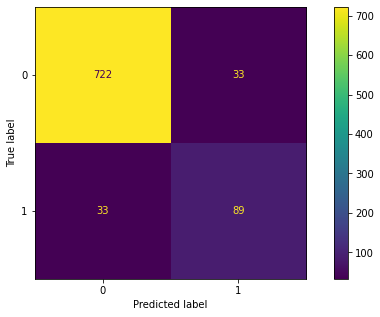

In [35]:
plt.rcParams['figure.figsize'] = 10, 5

print(f1_score(y_test, y_pred, average='micro'))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

print(classification_report(y_test,y_pred))
plot_confusion_matrix(neigh, X_test, y_test)